# 7 Statistics with NumPy
## 7_8 Practice Exam 3
- np.sort() .-| axis=None (flat) idem np.sort(np.reshape(X,))
- np.loadtxt() .-| delimiter=
- np.genfromtxt() .-| skip_header=, skip_footer=, usecols=, unpack=, dtype=
- npsave() .-| .npy
- np.savez() .-| .npz
- np.savetxt .-| .csv or .txt .-| delimiter=, fmt= '%s'
- np.min() - np.amin() - np.max() - np.amax() .-| axis=
- np.minimun(), np.maximun() .-| .reduce() .-| 
- np.median() .-| axis=
- np.percentile() .-| q=0-100, axis=
- np.quantile() .-| q=0-1, axis=
- np.mean() .-| axis=
- np.average() .-| weights=, axis=
- np.cov() .-| m, y=None, rowvar=True .-| cov(X,X)= var(X)
- np.corrcoef .-| x, y=None, rowvar=True
- np.histogram .-| a, bins=, range=
- np.histogram2d .-| x, y, bins=, range=
- np.histogramdd .-| sample, bins, range=
- NAN equiv funct. - np.nanvar() - np.nan... .-| jm -> np.histogram(A[~np.isnan(A)])

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

sns.set_style('darkgrid')
#sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
array_RG = gen(pcg(seed=365))
np.__version__

'1.26.4'

In [19]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    quotechar=None,
    like=None,
)
Docstring:
Load data from a text file.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
    that generators must return bytes or strings. The strings
    in a list or produced by a generator are treated as lines.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or

In [20]:
np.genfromtxt?

Signature:
np.genfromtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    skip_header=0,
    skip_footer=0,
    converters=None,
    missing_values=None,
    filling_values=None,
    usecols=None,
    names=None,
    excludelist=None,
    deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~",
    replace_space='_',
    autostrip=False,
    case_sensitive=True,
    defaultfmt='f%i',
    unpack=None,
    usemask=False,
    loose=True,
    invalid_raise=True,
    max_rows=None,
    encoding='bytes',
    *,
    ndmin=0,
    like=None,
)
Docstring:
Load data from a text file, with missing values handled as specified.

Each line past the first `skip_header` lines is split at the `delimiter`
character, and characters following the `comments` character are discarded.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decomp

In [21]:
# Function show_attr

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [22]:
# Function that Compute and plot NumPy 2-D histogram

def histo2d_w_graph(xv: np.ndarray, yv: np.ndarray,
                    bs: int = 10, sid: bool = False):
    ''' Compute and plot NumPy 2-D histogram
    
    xv: xvalues, 1-D ndarray, first axis, X
    yv: yvalues
    bs: -optional- Bins number, default '10'
    sid: -optinal- Show Input Data, default 'False'
    ''' 
    # h2df: NumPy Histogram 2-D inside function
    h2df = np.histogram2d(x=xv, y=yv, bins=bs)

    # n_da: NumPy density array; x_e: X_edges; y_e: Y_edges
    n_da, x_e, y_e = h2df[0], h2df[1], h2df[2]

    # Seaborn two subplots graphs
    fig, axs = plt.subplots(ncols=2, figsize=(10,6))
    plt.subplots_adjust(wspace=0.3)

    h2d_plot = sns.histplot(x=xv, y=yv, ax=axs[0], bins=bs)
    h2d_plot.set(xticks=x_e, yticks=y_e)
    h2d_plot.set_title('2-D Histogram')

    sct = sns.scatterplot(x=xv, y=yv, ax=axs[1])
    sct.set(xticks=x_e, yticks=y_e)
    sct.set_title('Scatter plot')

    if sid:
      print(f'Input Data:\n X values: {xv}\n Y values: {yv}\n')

    print(f'NumPy Density Array:\n{n_da}')
    print(f'X Edges:\n {x_e}')
    print(f'Y Edges:\n {y_e}\n')
    print(f'Density Array with relocated values:\n'
          f'{np.array(list(map(lambda row: row[::-1], n_da))).T}')
    
    plt.show()

In [23]:
lending_co_data = np.genfromtxt('Lending-Company-Numeric-Data.csv',
                                delimiter=',')

print(show_attr('lending_co_data') + '\n')
print(lending_co_data)

 lending_co_data: | shape: (1043, 6) | ndim: 2 | size: 6258 | dtype: float64 

[[ 2000.    40.   365.  3121.  4241. 13621.]
 [ 2000.    40.   365.  3061.  4171. 15041.]
 [ 1000.    40.   365.  2160.  3280. 15340.]
 ...
 [ 2000.    40.   365.  4201.  5001. 16600.]
 [ 1000.    40.   365.  2080.  3320. 15600.]
 [ 2000.    40.   365.  4601.  4601. 16600.]]


In [24]:
lending_co_NAN = np.genfromtxt('Lending-Company-Numeric-Data-NAN.csv',
                                delimiter=';')

print(show_attr('lending_co_NAN') + '\n')
print(lending_co_NAN)

 lending_co_NAN: | shape: (1043, 6) | ndim: 2 | size: 6258 | dtype: float64 

[[ 2000.    40.   365.  3121.  4241. 13621.]
 [ 2000.    40.   365.  3061.  4171. 15041.]
 [ 1000.    40.   365.  2160.  3280. 15340.]
 ...
 [   nan    40.   365.  4201.  5001. 16600.]
 [ 1000.    40.   365.  2080.  3320. 15600.]
 [ 2000.    40.   365.  4601.  4601. 16600.]]


### Other exercises to practice


In [34]:
# Q4 Sort a flattened version of the array
A = np.array([[12,34,-15,56], [23,22,90,-56],
              [4,-19,27,31], [45,56,61,70]])
display(A)
show_attr('A')
display(np.sort(A, axis=None))
np.percentile(A, 88)

array([[ 12,  34, -15,  56],
       [ 23,  22,  90, -56],
       [  4, -19,  27,  31],
       [ 45,  56,  61,  70]])

array([-56, -19, -15,   4,  12,  22,  23,  27,  31,  34,  45,  56,  56,
        61,  70,  90])

62.8

In [36]:
# Q4 Sort a flattened version of the array
A = np.array([[58,62,92,79,65], [91,66,72,74,84],
              [38,81,23,45,89], [49,95,86,26,90]])
display(A)
show_attr('A')
display(np.sort(A, axis=None))
np.percentile(A, 75)

array([[58, 62, 92, 79, 65],
       [91, 66, 72, 74, 84],
       [38, 81, 23, 45, 89],
       [49, 95, 86, 26, 90]])

array([23, 26, 38, 45, 49, 58, 62, 65, 66, 72, 74, 79, 81, 84, 86, 89, 90,
       91, 92, 95])

86.75

In [42]:
C = np.array([[1,2,-4,9], [1,12,-3,12], [1,2,3,4], [5,6,-10,3]])
display(np.cov(C[0], C[2]))
display(np.corrcoef(C[0], C[2]))
np.cov(C)
np.corrcoef(C)

array([[28.66666667,  3.        ],
       [ 3.        ,  1.66666667]])

array([[1.        , 0.43401854],
       [0.43401854, 1.        ]])

array([[ 1.        ,  0.81862596,  0.43401854,  0.63607792],
       [ 0.81862596,  1.        ,  0.30253169,  0.70590246],
       [ 0.43401854,  0.30253169,  1.        , -0.38181557],
       [ 0.63607792,  0.70590246, -0.38181557,  1.        ]])

In [26]:
display(np.sort(A, axis=None))
display(np.sort(np.reshape(A, (16,))))
display(np.sort(A).reshape(16,))        # BAD

array([-56, -19, -15,   4,  12,  22,  23,  27,  31,  34,  45,  56,  56,
        61,  70,  90])

array([-56, -19, -15,   4,  12,  22,  23,  27,  31,  34,  45,  56,  56,
        61,  70,  90])

array([-15,  12,  34,  56, -56,  22,  23,  90, -19,   4,  27,  31,  45,
        56,  61,  70])

In [27]:
# Q5 For Q5, you are right, it gives 25.6
# Q6 
cols = gen(pcg(seed=365))
c_1 = cols.normal(loc=3, scale=2, size=500)
c_2 = cols.exponential(scale=5, size=500)
c_3 = cols.logistic(loc=10, scale=4, size=500)

np.max(np.array([c_1, c_2, c_3]).T)

35.04153699695336

- Histogram: a way to examine a dataset by dissecting (diseccionando - dividiendo - estudiando) its density.
- Density: how populated a given area is - stats -> How many values from a dataset fall within some predetermined range

In [28]:
# Question 8 part D answers are wrong. Histogram for 3-D was drawn not for 2D.
# Question 9 title in Statistics-With-NumPy-Solution should be "For the 2-D array" and not for 3-D.

In [44]:
# Q6 
c_q = np.array([39,30,35,21,22,3,10,3,22,4,21,29,37,34,12,4,35,7,12,19,34,39,1,12,
                11,26,2,17,3,16,9,33,5,15,9])
display(show_attr('c_q'))
hs = np.histogram(c_q, bins=(0,10,16,22,28,34,40))
hs

' c_q: | shape: (35,) | ndim: 1 | size: 35 | dtype: int32 '

(array([11,  6,  5,  3,  3,  7], dtype=int64),
 array([ 0, 10, 16, 22, 28, 34, 40]))

<function matplotlib.pyplot.show(close=None, block=None)>

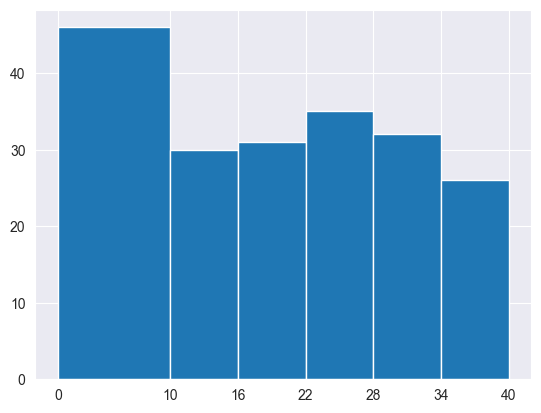

In [30]:
plt.hist(c_q, bins=hs[1])
plt.xticks(hs[1])
plt.show

In [31]:
# Q2 Obtain the minimum for each columns
t1 = np.genfromtxt('Lending-Company-Numeric-Data.csv', delimiter=',')
display(np.min(t1))                       # Only to show the total min
display(np.min(t1, axis=0))
display(np.minimum.reduce(t1, axis=0))
display(np.minimum.reduce(t1))
display(np.minimum.reduce(t1, axis=1))      # NO they are files

-2870.0

array([ 1000.,    35.,   365., -2870., -2870.,  -350.])

array([ 1000.,    35.,   365., -2870., -2870.,  -350.])

array([ 1000.,    35.,   365., -2870., -2870.,  -350.])

array([40., 40., 40., ..., 40., 40., 40.])

#### NAN-equiv functs. are useful when we have incomplete data.
- They run while ignoring all NAN values in the data.
- It would be in our best interest to find and fill any missing values, if we have the chance.

In [32]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])
display(A)
print(show_attr('A'))

B = np.array([[1,0,0,3,1],
              [3,6,np.nan,2,9],
              [4,5,3,8,0]])
display(B)
print(show_attr('B'))


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

 A: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int32 


array([[ 1.,  0.,  0.,  3.,  1.],
       [ 3.,  6., nan,  2.,  9.],
       [ 4.,  5.,  3.,  8.,  0.]])

 B: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: float64 
